<a href="https://colab.research.google.com/github/ahberson/Berson_QNC_Fall2025/blob/main/Berson_QNC_Presentation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The below code/figures were utilized in my QNC Presentation #2 on 11/24/25 (Aaron Berson)

# Two "Perfect Prediction" Curve Examples

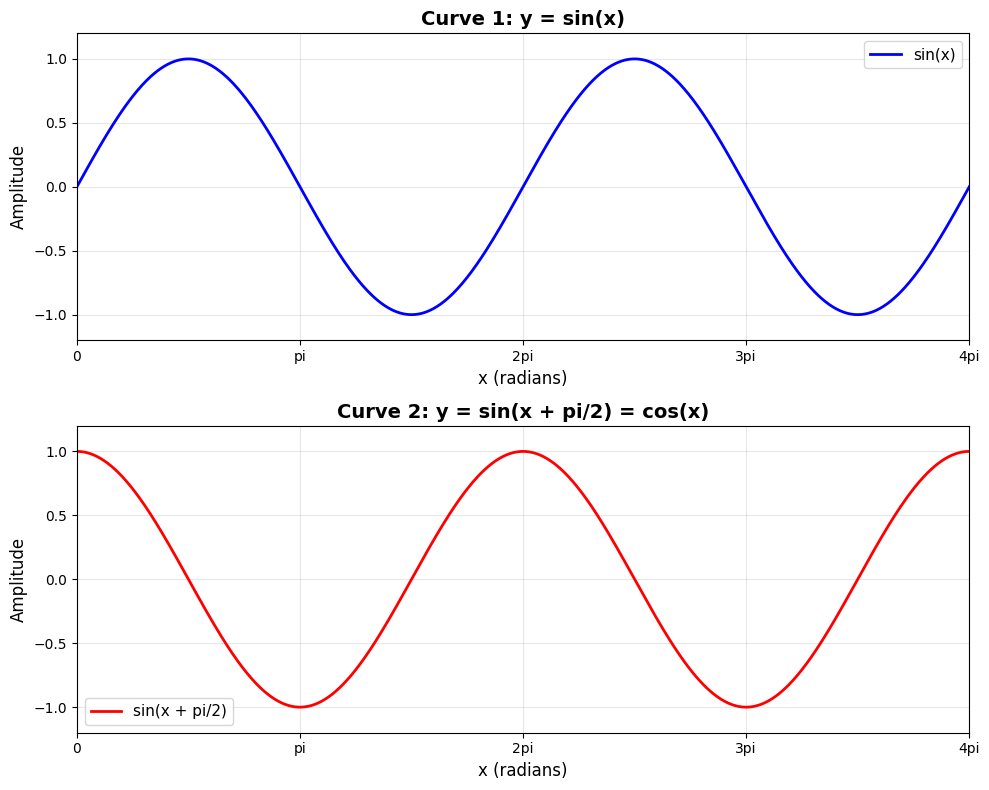



GRANGER CAUSALITY ANALYSIS


1. Testing if Curve 1 (sin(x)) Granger-causes Curve 2 (sin(x + pi/2)):
------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


InfeasibleTestError: The Granger causality test statistic cannot be computed because the VAR has a perfect fit of the data.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Show 2 cycles
x = np.linspace(0, 4 * np.pi, 1000)

# Generate two sinusoidal curves with pi/2 phase shift
y1 = np.sin(x)                    # First curve: sin(x)
y2 = np.sin(x + np.pi/2)          # Second curve: sin(x + pi/2) = cos(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# First subplot - sin(x)
ax1.plot(x, y1, 'b-', linewidth=2, label='sin(x)')
ax1.set_xlabel('x (radians)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_title('Curve 1: y = sin(x)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(0, 4*np.pi)
ax1.set_ylim(-1.2, 1.2)
ax1.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax1.set_xticklabels(['0', 'pi', '2pi', '3pi', '4pi'])

# Second subplot - sin(x + pi/2)
ax2.plot(x, y2, 'r-', linewidth=2, label='sin(x + pi/2)')
ax2.set_xlabel('x (radians)', fontsize=12)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.set_title('Curve 2: y = sin(x + pi/2) = cos(x)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xlim(0, 4*np.pi)
ax2.set_ylim(-1.2, 1.2)
ax2.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax2.set_xticklabels(['0', 'pi', '2pi', '3pi', '4pi'])

plt.tight_layout()
plt.show()

print()
print()
print("GRANGER CAUSALITY ANALYSIS")
print()

# Prepare data for Granger causality test
# Need to create a 2D array with both time series
data = np.column_stack([y1, y2])

print("\n1. Testing if Curve 1 (sin(x)) Granger-causes Curve 2 (sin(x + pi/2)):")
print("-" * 60)
# Test if y1 causes y2
max_lag = 10
results_y1_to_y2 = grangercausalitytests(data[:, [1, 0]], max_lag, verbose=False)

for lag in range(1, max_lag + 1):
    f_test = results_y1_to_y2[lag][0]['ssr_ftest']
    p_value = f_test[1]
    print(f"Lag {lag}: F-statistic = {f_test[0]:.4f}, p-value = {p_value:.4e}")

print("\n2. Testing if Curve 2 (sin(x + pi/2)) Granger-causes Curve 1 (sin(x)):")
print("-" * 60)
# Test if y2 causes y1
results_y2_to_y1 = grangercausalitytests(data[:, [0, 1]], max_lag, verbose=False)

for lag in range(1, max_lag + 1):
    f_test = results_y2_to_y1[lag][0]['ssr_ftest']
    p_value = f_test[1]
    print(f"Lag {lag}: F-statistic = {f_test[0]:.4f}, p-value = {p_value:.4e}")

print()
print("INTERPRETATION:")
print()
print("A low p-value (< 0.05) suggests Granger causality.")

**Result**: GC Error!

# Perfect Curves But Now With Noise

If two curves perfectly predict each other (as is the case above), GC will return an error. Let's add noise to each curve to see what happens then.

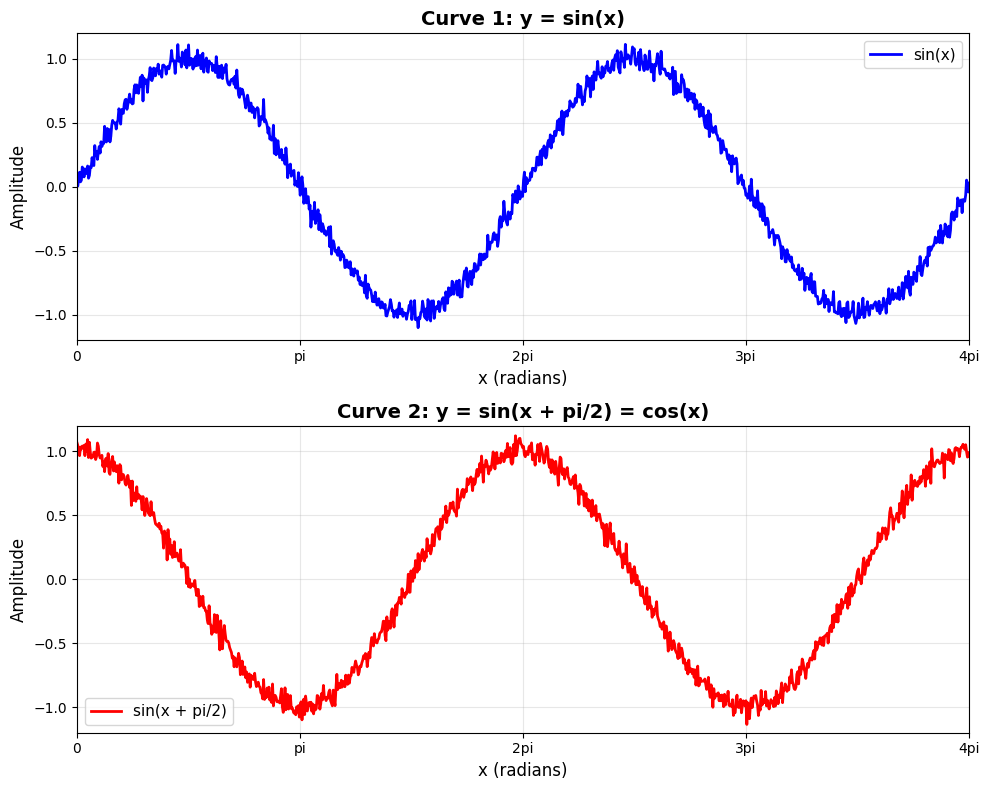


GRANGER CAUSALITY ANALYSIS

1. Testing if Curve 1 (sin(x)) Granger-causes Curve 2 (sin(x + pi/2)):
------------------------------------------------------------
Lag 1: F-statistic = 15.1766, p-value = 1.0445e-04
Lag 2: F-statistic = 22.8917, p-value = 1.9083e-10
Lag 3: F-statistic = 31.3615, p-value = 2.2753e-19
Lag 4: F-statistic = 33.6221, p-value = 2.5193e-26
Lag 5: F-statistic = 35.4047, p-value = 2.2381e-33
Lag 6: F-statistic = 33.9963, p-value = 2.0986e-37
Lag 7: F-statistic = 32.4755, p-value = 1.0452e-40
Lag 8: F-statistic = 29.1421, p-value = 5.8472e-41
Lag 9: F-statistic = 27.7681, p-value = 4.4527e-43
Lag 10: F-statistic = 26.0841, p-value = 3.3997e-44

2. Testing if Curve 2 (sin(x + pi/2)) Granger-causes Curve 1 (sin(x)):
------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Lag 1: F-statistic = 16.1285, p-value = 6.3635e-05
Lag 2: F-statistic = 25.1995, p-value = 2.1119e-11
Lag 3: F-statistic = 31.9604, p-value = 1.0108e-19
Lag 4: F-statistic = 32.6127, p-value = 1.4546e-25
Lag 5: F-statistic = 37.1618, p-value = 5.8268e-35
Lag 6: F-statistic = 38.2315, p-value = 7.6691e-42
Lag 7: F-statistic = 37.2706, p-value = 2.0158e-46
Lag 8: F-statistic = 30.1498, p-value = 2.4785e-42
Lag 9: F-statistic = 28.9657, p-value = 7.0033e-45
Lag 10: F-statistic = 26.3118, p-value = 1.4254e-44

INTERPRETATION:
A low p-value (< 0.05) suggests Granger causality exists.

Note: Small random noise was added to the sinusoidal curves
to avoid perfect determinism (which causes test failure).
The underlying phase relationship (pi/2 shift) is preserved.

These curves still have a strong mathematical relationship,
so we expect to see evidence of Granger causality in both
directions, particularly at certain lag values.


In [6]:
# Show 2 cycles
x = np.linspace(0, 4 * np.pi, 1000)

# Generate two sinusoidal curves with pi/2 phase shift
# Add small random noise to avoid perfect determinism for Granger causality test
np.random.seed(42)  # For reproducibility
noise_level = 0.05
y1 = np.sin(x) + np.random.normal(0, noise_level, len(x))                   # First curve: sin(x)
y2 = np.sin(x + np.pi/2) + np.random.normal(0, noise_level, len(x))         # Second curve: sin(x + pi/2) = cos(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# First subplot - sin(x)
ax1.plot(x, y1, 'b-', linewidth=2, label='sin(x)')
ax1.set_xlabel('x (radians)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_title('Curve 1: y = sin(x)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(0, 4*np.pi)
ax1.set_ylim(-1.2, 1.2)
ax1.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax1.set_xticklabels(['0', 'pi', '2pi', '3pi', '4pi'])

# Second subplot - sin(x + pi/2)
ax2.plot(x, y2, 'r-', linewidth=2, label='sin(x + pi/2)')
ax2.set_xlabel('x (radians)', fontsize=12)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.set_title('Curve 2: y = sin(x + pi/2) = cos(x)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xlim(0, 4*np.pi)
ax2.set_ylim(-1.2, 1.2)
ax2.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax2.set_xticklabels(['0', 'pi', '2pi', '3pi', '4pi'])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("GRANGER CAUSALITY ANALYSIS")
print("="*60)

# Prepare data for Granger causality test
# Need to create a 2D array with both time series
data = np.column_stack([y1, y2])

print("\n1. Testing if Curve 1 (sin(x)) Granger-causes Curve 2 (sin(x + pi/2)):")
print("-" * 60)
# Test if y1 causes y2
max_lag = 10
results_y1_to_y2 = grangercausalitytests(data[:, [1, 0]], max_lag, verbose=False)

for lag in range(1, max_lag + 1):
    f_test = results_y1_to_y2[lag][0]['ssr_ftest']
    p_value = f_test[1]
    print(f"Lag {lag}: F-statistic = {f_test[0]:.4f}, p-value = {p_value:.4e}")

print("\n2. Testing if Curve 2 (sin(x + pi/2)) Granger-causes Curve 1 (sin(x)):")
print("-" * 60)
# Test if y2 causes y1
results_y2_to_y1 = grangercausalitytests(data[:, [0, 1]], max_lag, verbose=False)

for lag in range(1, max_lag + 1):
    f_test = results_y2_to_y1[lag][0]['ssr_ftest']
    p_value = f_test[1]
    print(f"Lag {lag}: F-statistic = {f_test[0]:.4f}, p-value = {p_value:.4e}")

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("A low p-value (< 0.05) suggests Granger causality exists.")
print("\nNote: Small random noise was added to the sinusoidal curves")
print("to avoid perfect determinism (which causes test failure).")
print("The underlying phase relationship (pi/2 shift) is preserved.")
print("\nThese curves still have a strong mathematical relationship,")
print("so we expect to see evidence of Granger causality in both")
print("directions, particularly at certain lag values.")
print("="*60)


**Result**: Bidirectional GC!

# Case Where Curve 1 is Independent of Curve 2. However, Curve 2 will be driven by Curve 1.

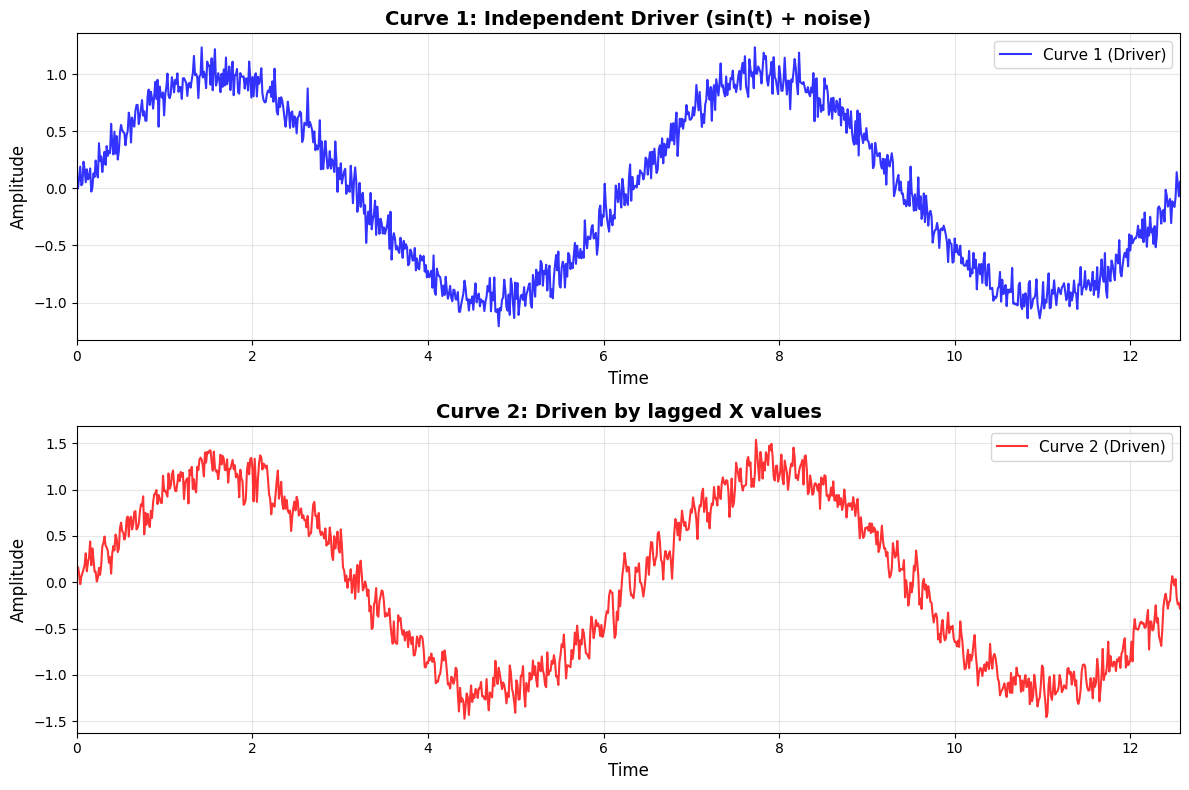


GRANGER CAUSALITY ANALYSIS

Data Generation Process:
  X(t) = sin(t) + noise  [independent]
  Y(t) = 0.5*Y(t-1) + 0.6*X(t-5) + noise  [depends on X]

Expectation: X should Granger-cause Y, but Y should NOT Granger-cause X

1. Testing if Curve 1 Granger-causes Curve 2:
----------------------------------------------------------------------
Lag  1: F = 156.9707, p-value = 1.5158e-33 ***
Lag  2: F =  81.7588, p-value = 1.3496e-33 ***
Lag  3: F =  50.6350, p-value = 1.8945e-30 ***
Lag  4: F =  40.2839, p-value = 2.7262e-31 ***
Lag  5: F = 132.9990, p-value = 1.0185e-107 ***
Lag  6: F = 110.5295, p-value = 1.9396e-106 ***
Lag  7: F =  91.7732, p-value = 9.4023e-103 ***
Lag  8: F =  78.9011, p-value = 2.4524e-100 ***
Lag  9: F =  69.2854, p-value = 2.0428e-98 ***
Lag 10: F =  61.9214, p-value = 5.9247e-97 ***

2. Testing if Curve 2 Granger-causes Curve 1:
----------------------------------------------------------------------
Lag  1: F = 210.8635, p-value = 1.7656e-43 ***
Lag  2: F =  40.9933

In [10]:
np.random.seed(42) #for reproducability

n_points = 1000
t = np.linspace(0, 4 * np.pi, n_points) # 2 cycles again

# Create X: Independent sinusoidal curve (the "driver")
# This is completely independent - not influenced by Y
X = np.sin(t) + np.random.normal(0, 0.1, n_points)

# Create Y: Dependent on past values of X (the "driven" variable)
# Y is influenced by lagged values of X, but X is not influenced by Y
Y = np.zeros(n_points)
Y[0] = np.random.normal(0, 0.1)  # Initial value

# Generate Y as a function of past X values (causal relationship X -> Y)
# Y(t) depends on X(t-5), creating a lagged dependency
lag_effect = 5
for i in range(1, n_points):
    if i >= lag_effect:
        # Y is driven by lagged X plus its own dynamics plus noise
        Y[i] = 0.5 * Y[i-1] + 0.6 * X[i-lag_effect] + np.random.normal(0, 0.1)
    else:
        # Before lag_effect, Y just has autoregressive behavior
        Y[i] = 0.5 * Y[i-1] + np.random.normal(0, 0.1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# First subplot - X (the driver)
ax1.plot(t, X, 'b-', linewidth=1.5, label='Curve 1 (Driver)', alpha=0.8)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_title('Curve 1: Independent Driver (sin(t) + noise)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(0, 4*np.pi)

# Second subplot - Y (driven by X)
ax2.plot(t, Y, 'r-', linewidth=1.5, label='Curve 2 (Driven)', alpha=0.8)
ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.set_title('Curve 2: Driven by lagged X values', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xlim(0, 4*np.pi)

plt.tight_layout()
plt.show()

# Granger Causality Analysis
print("\n" + "="*70)
print("GRANGER CAUSALITY ANALYSIS")
print("="*70)
print("\nData Generation Process:")
print("  X(t) = sin(t) + noise  [independent]")
print("  Y(t) = 0.5*Y(t-1) + 0.6*X(t-5) + noise  [depends on X]")
print("\nExpectation: X should Granger-cause Y, but Y should NOT Granger-cause X")
print("="*70)

# Prepare data
data = np.column_stack([X, Y])

# Test 1: Does X Granger-cause Y?
print("\n1. Testing if Curve 1 Granger-causes Curve 2:")
print("-" * 70)
max_lag = 10
results_X_to_Y = grangercausalitytests(data[:, [1, 0]], max_lag, verbose=False)

for lag in range(1, max_lag + 1):
    f_test = results_X_to_Y[lag][0]['ssr_ftest']
    f_stat = f_test[0]
    p_value = f_test[1]
    significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else ""))
    print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p-value = {p_value:.4e} {significance}")

# Test 2: Does Y Granger-cause X?
print("\n2. Testing if Curve 2 Granger-causes Curve 1:")
print("-" * 70)
results_Y_to_X = grangercausalitytests(data[:, [0, 1]], max_lag, verbose=False)

for lag in range(1, max_lag + 1):
    f_test = results_Y_to_X[lag][0]['ssr_ftest']
    f_stat = f_test[0]
    p_value = f_test[1]
    significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else ""))
    print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p-value = {p_value:.4e} {significance}")

# Summary comparison
print("\n" + "="*70)
print("SUMMARY COMPARISON")
print("="*70)
print("\nSignificance markers: *** p<0.001, ** p<0.01, * p<0.05")
print("\nDirection 1 (Curve 1 → Curve 2): Should show STRONG causality (low p-values)")
print("Direction 2 (Curve 2 → Curve 1): Should show WEAK/NO causality (high p-values)")
print("\nKey Insight:")
print("  - Curve 1 is an exogenous driver (independent)")
print("  - Curve 2 is endogenous (depends on Curve 1)")
print("  - This creates unidirectional causality")
print("="*70)

**Result**: Unidirectional GC! Across lags, Curve 1 consistently predicts Curve 2. However, it's interesting to note that Curve 2 also predicts Curve 1 at short lags.

# Say Curve 1 (X) and Curve 2 (Y) are Independent. However, Curve 3 (Z) drives both X and Y.

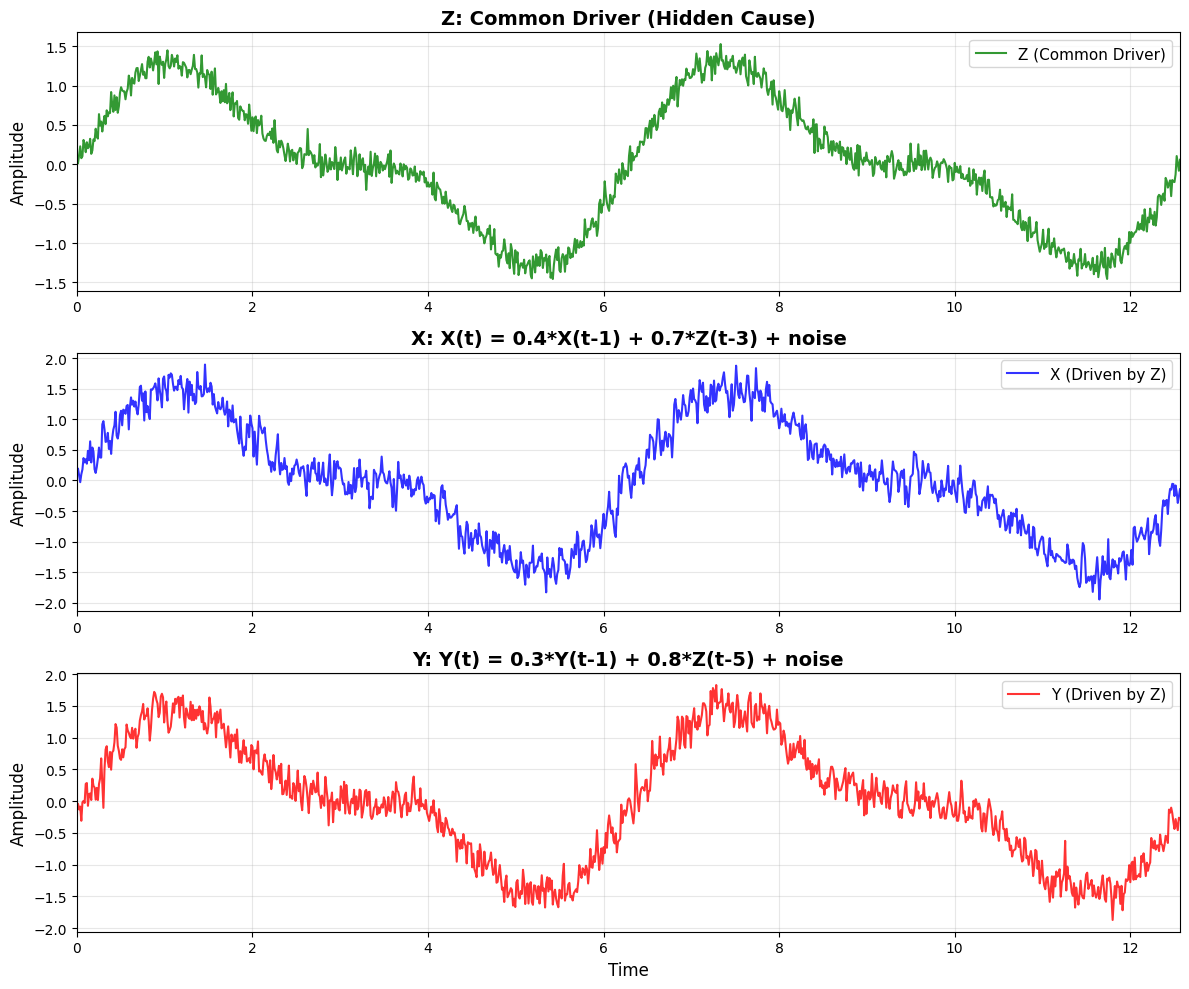


GRANGER CAUSALITY ANALYSIS

Data Generation Process:
  Z(t) = sin(t) + 0.5*sin(2t) + noise  [independent common driver]
  X(t) = 0.4*X(t-1) + 0.7*Z(t-3) + noise  [driven by Z]
  Y(t) = 0.3*Y(t-1) + 0.8*Z(t-5) + noise  [driven by Z]

Expected Results:
  Z → X: STRONG (Z causes X)
  Z → Y: STRONG (Z causes Y)
  X ↔ Y: SPURIOUS correlation (both driven by Z, not each other)

PAIR 1: Z and X

1a. Does Z Granger-cause X? (EXPECTED: YES)
---------------------------------------------------------------------------
Lag  1: F = 271.2262, p = 4.4429e-54 ***
Lag  2: F = 114.0256, p = 2.6419e-45 ***
Lag  3: F = 172.8372, p = 4.2353e-90 ***
Lag  4: F = 125.2095, p = 1.8296e-86 ***
Lag  5: F =  93.1478, p = 2.3879e-80 ***
Lag  6: F =  77.0891, p = 6.4968e-79 ***
Lag  7: F =  63.9550, p = 8.1469e-76 ***
Lag  8: F =  55.9553, p = 6.2510e-75 ***
Lag  9: F =  48.0078, p = 8.6110e-72 ***
Lag 10: F =  42.4403, p = 7.6143e-70 ***

1b. Does X Granger-cause Z? (EXPECTED: NO)
---------------------------------

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

n_points = 1000
t = np.linspace(0, 4 * np.pi, n_points)

# Create Z: The common driver - drives both X and Y
Z = np.sin(t) + 0.5 * np.sin(2*t) + np.random.normal(0, 0.1, n_points)

# X: Influenced by Z with lag 3
X = np.zeros(n_points)
X[0] = np.random.normal(0, 0.1)
lag_Z_to_X = 3
for i in range(1, n_points):
    if i >= lag_Z_to_X:
        X[i] = 0.4 * X[i-1] + 0.7 * Z[i-lag_Z_to_X] + np.random.normal(0, 0.15)
    else:
        X[i] = 0.4 * X[i-1] + np.random.normal(0, 0.15)

# Y: Also influenced by Z with lag 5
Y = np.zeros(n_points)
Y[0] = np.random.normal(0, 0.1)
lag_Z_to_Y = 5
for i in range(1, n_points):
    if i >= lag_Z_to_Y:
        Y[i] = 0.3 * Y[i-1] + 0.8 * Z[i-lag_Z_to_Y] + np.random.normal(0, 0.15)
    else:
        Y[i] = 0.3 * Y[i-1] + np.random.normal(0, 0.15)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# First subplot - Z (the common driver)
ax1.plot(t, Z, 'g-', linewidth=1.5, label='Z (Common Driver)', alpha=0.8)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_title('Z: Common Driver (Hidden Cause)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11, loc='upper right')
ax1.set_xlim(0, 4*np.pi)

# Second subplot - X (driven by Z)
ax2.plot(t, X, 'b-', linewidth=1.5, label='X (Driven by Z)', alpha=0.8)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.set_title('X: X(t) = 0.4*X(t-1) + 0.7*Z(t-3) + noise', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11, loc='upper right')
ax2.set_xlim(0, 4*np.pi)

# Third subplot - Y (driven by Z)
ax3.plot(t, Y, 'r-', linewidth=1.5, label='Y (Driven by Z)', alpha=0.8)
ax3.set_xlabel('Time', fontsize=12)
ax3.set_ylabel('Amplitude', fontsize=12)
ax3.set_title('Y: Y(t) = 0.3*Y(t-1) + 0.8*Z(t-5) + noise', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=11, loc='upper right')
ax3.set_xlim(0, 4*np.pi)

plt.tight_layout()
plt.show()

# Granger Causality Analysis for all pairs
print("\n" + "="*75)
print("GRANGER CAUSALITY ANALYSIS")
print("="*75)
print("\nData Generation Process:")
print("  Z(t) = sin(t) + 0.5*sin(2t) + noise  [independent common driver]")
print("  X(t) = 0.4*X(t-1) + 0.7*Z(t-3) + noise  [driven by Z]")
print("  Y(t) = 0.3*Y(t-1) + 0.8*Z(t-5) + noise  [driven by Z]")
print("\nExpected Results:")
print("  Z → X: STRONG (Z causes X)")
print("  Z → Y: STRONG (Z causes Y)")
print("  X ↔ Y: SPURIOUS correlation (both driven by Z, not each other)")
print("="*75)

max_lag = 10

# Prepare all data combinations
data_ZX = np.column_stack([Z, X])
data_ZY = np.column_stack([Z, Y])
data_XY = np.column_stack([X, Y])

def print_gc_results(results, direction_name):
    """Helper function to print Granger causality results"""
    print(f"\n{direction_name}")
    print("-" * 75)
    for lag in range(1, max_lag + 1):
        f_test = results[lag][0]['ssr_ftest']
        f_stat = f_test[0]
        p_value = f_test[1]
        significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else "   "))
        print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p = {p_value:.4e} {significance}")

# Test 1: Z → X
print("\n" + "="*75)
print("PAIR 1: Z and X")
print("="*75)
results_Z_to_X = grangercausalitytests(data_ZX[:, [1, 0]], max_lag, verbose=False)
print_gc_results(results_Z_to_X, "1a. Does Z Granger-cause X? (EXPECTED: YES)")

results_X_to_Z = grangercausalitytests(data_ZX[:, [0, 1]], max_lag, verbose=False)
print_gc_results(results_X_to_Z, "1b. Does X Granger-cause Z? (EXPECTED: NO)")

# Test 2: Z → Y
print("\n" + "="*75)
print("PAIR 2: Z and Y")
print("="*75)
results_Z_to_Y = grangercausalitytests(data_ZY[:, [1, 0]], max_lag, verbose=False)
print_gc_results(results_Z_to_Y, "2a. Does Z Granger-cause Y? (EXPECTED: YES)")

results_Y_to_Z = grangercausalitytests(data_ZY[:, [0, 1]], max_lag, verbose=False)
print_gc_results(results_Y_to_Z, "2b. Does Y Granger-cause Z? (EXPECTED: NO)")

# Test 3: X ↔ Y
print("\n" + "="*75)
print("PAIR 3: X and Y (Both driven by common cause Z)")
print("="*75)
results_X_to_Y = grangercausalitytests(data_XY[:, [1, 0]], max_lag, verbose=False)
print_gc_results(results_X_to_Y, "3a. Does X Granger-cause Y? (EXPECTED: SPURIOUS)")

results_Y_to_X = grangercausalitytests(data_XY[:, [0, 1]], max_lag, verbose=False)
print_gc_results(results_Y_to_X, "3b. Does Y Granger-cause X? (EXPECTED: SPURIOUS)")

# Summary
print("\n" + "="*75)
print("SUMMARY: The Confounding Problem")
print("="*75)
print("""
Key Insight: X and Y may show Granger causality between each other even though
neither directly causes the other! This is because:

1. Z is the true common driver of both X and Y
2. X and Y are correlated through their shared dependence on Z
3. Past values of X contain information about past Z, which helps predict Y
4. This creates SPURIOUS Granger causality between X and Y

This demonstrates a critical limitation of Granger causality:
  "Correlation does not imply causation"

Even with temporal precedence, X→Y causality may be spurious if there's
a hidden common cause (confounding variable).

To detect true causality, you would need:
  - Conditional Granger causality (controlling for Z)
  - Domain knowledge about the causal structure
  - Experimental manipulation (not just observational data)
""")
print("="*75)
print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05")
print("="*75)

**Result**: Z reliably predicts X and Y, but X and Y also show bidirectional GC. This is a spurious correlation and one that needs to be considered in future efforts.

# X and Y are independent but non-stationary

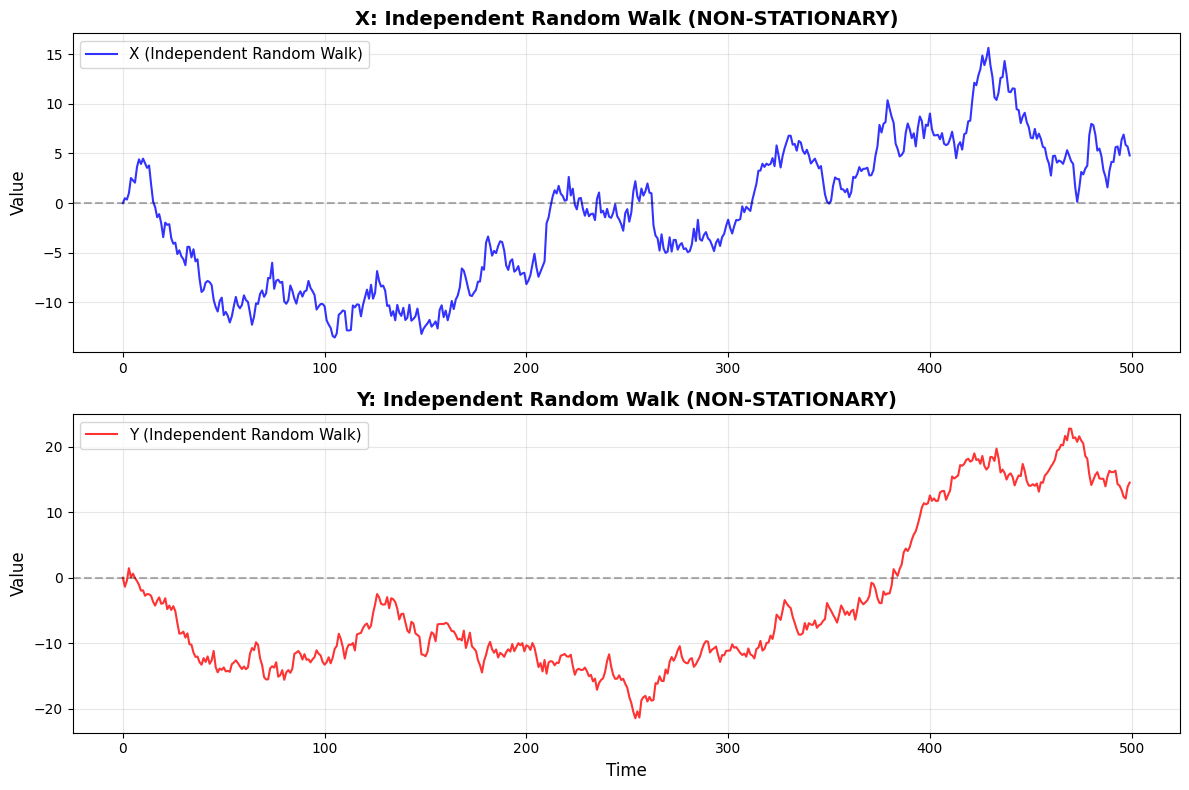


STEP 1: STATIONARITY TESTS (Augmented Dickey-Fuller)

Null Hypothesis: The series has is NON-STATIONARY
If p-value > 0.05: Cannot reject null → Series is NON-STATIONARY
If p-value < 0.05: Reject null → Series is STATIONARY

Series X:
  ADF Statistic: -1.4416
  p-value: 0.5622
  Critical values: 1%=-3.444, 5%=-2.867, 10%=-2.570
  → Result: NON-STATIONARY (p > 0.05) ⚠️

Series Y:
  ADF Statistic: -0.2909
  p-value: 0.9268
  Critical values: 1%=-3.444, 5%=-2.867, 10%=-2.570
  → Result: NON-STATIONARY (p > 0.05) ⚠️

GRANGER CAUSALITY ANALYSIS ON X AND Y (UNCORRECTED)

 CRITICAL: Both X and Y are:
  1. Completely INDEPENDENT (generated separately)
  2. Both NON-STATIONARY (random walks)
  3. Have NO TRUE CAUSAL RELATIONSHIP

Despite this, we expect to see SPURIOUS significant results!
Testing if X Granger-causes Y:
---------------------------------------------------------------------------
Lag  1: F =   2.8465, p = 9.2203e-02    
Lag  2: F =   3.2182, p = 4.0868e-02 * SPURIOUS!
Lag  3: F =

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Lag  1: F =   1.4879, p = 2.2313e-01    
Lag  2: F =   1.3597, p = 2.5769e-01    
Lag  3: F =   1.4631, p = 2.2379e-01    
Lag  4: F =   1.6271, p = 1.6614e-01    
Lag  5: F =   1.1898, p = 3.1297e-01    
Lag  6: F =   0.9638, p = 4.4919e-01    
Lag  7: F =   0.9210, p = 4.8969e-01    
Lag  8: F =   1.2661, p = 2.5911e-01    
Lag  9: F =   1.2190, p = 2.8086e-01    
Lag 10: F =   1.0942, p = 3.6470e-01    

GRANGER CAUSALITY ANALYSIS ON ΔX and ΔY (Corrected Approach)

ΔX (first difference of X):
  ADF Statistic: -22.4059
  p-value: 0.0000
  Critical values: 1%=-3.444, 5%=-2.867, 10%=-2.570
  → Result: STATIONARY (p < 0.05) ✓

ΔY (first difference of Y):
  ADF Statistic: -22.5276
  p-value: 0.0000
  Critical values: 1%=-3.444, 5%=-2.867, 10%=-2.570
  → Result: STATIONARY (p < 0.05) ✓

✓ Now testing on first differences (ΔX and ΔY)
Since X and Y are truly independent, we should see NO causality here.

Testing if ΔX Granger-causes ΔY:
------------------------------------------------------

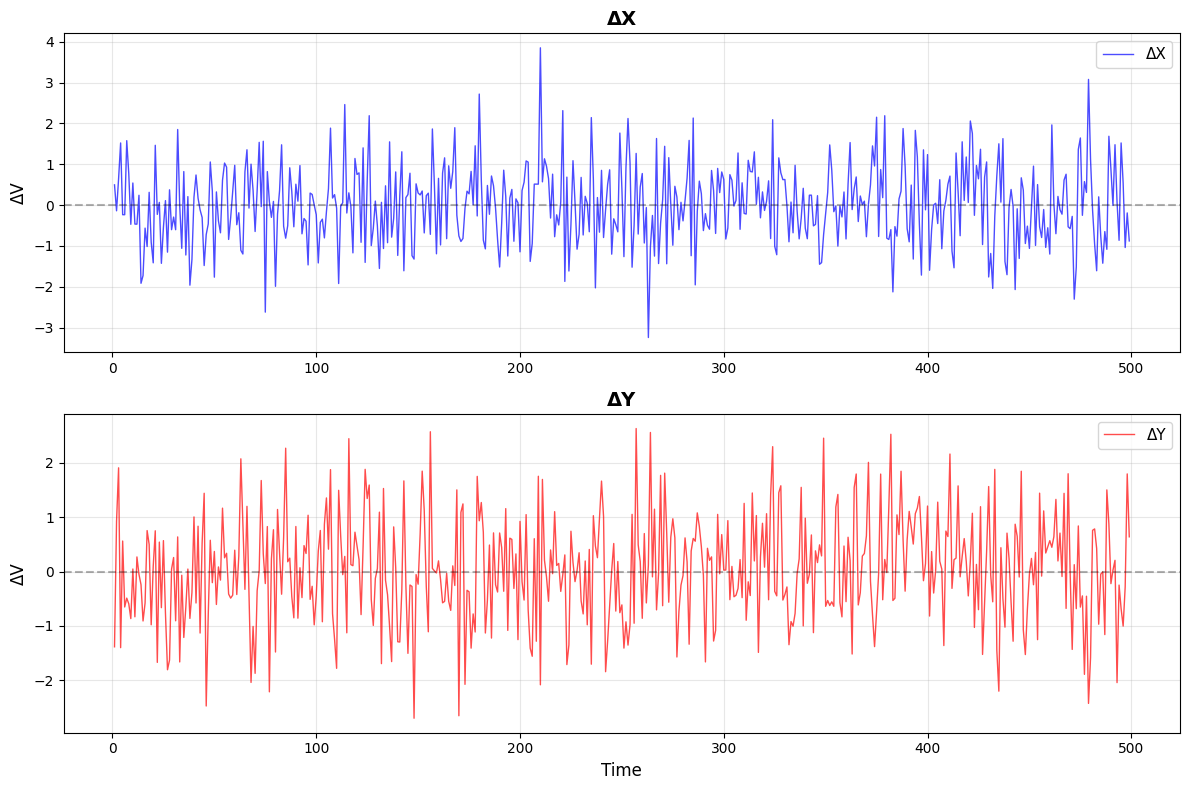

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

# Set random seed for reproducibility
np.random.seed(42)

n_points = 500
t = np.arange(n_points)

# Create X: Independent random walk (non-stationary)
# NO CONNECTION to Y whatsoever!
X = np.zeros(n_points)
X[0] = 0
for i in range(1, n_points):
    X[i] = X[i-1] + np.random.normal(0, 1)

# Create Y: Independent random walk (non-stationary)
# Also NO CONNECTION to X!
Y = np.zeros(n_points)
Y[0] = 0
for i in range(1, n_points):
    Y[i] = Y[i-1] + np.random.normal(0, 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# First subplot - X
ax1.plot(t, X, 'b-', linewidth=1.5, label='X (Independent Random Walk)', alpha=0.8)
ax1.set_ylabel('Value', fontsize=12)
ax1.set_title('X: Independent Random Walk (NON-STATIONARY)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11, loc='upper left')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Second subplot - Y
ax2.plot(t, Y, 'r-', linewidth=1.5, label='Y (Independent Random Walk)', alpha=0.8)
ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_title('Y: Independent Random Walk (NON-STATIONARY)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11, loc='upper left')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Test for stationarity using Augmented Dickey-Fuller test
print("\n" + "="*75)
print("STEP 1: STATIONARITY TESTS (Augmented Dickey-Fuller)")
print("="*75)
print("\nNull Hypothesis: The series has is NON-STATIONARY")
print("If p-value > 0.05: Cannot reject null → Series is NON-STATIONARY")
print("If p-value < 0.05: Reject null → Series is STATIONARY")
print("="*75)

def adf_test(series, name):
    result = adfuller(series, autolag='AIC')
    print(f"\n{name}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Critical values: 1%={result[4]['1%']:.3f}, 5%={result[4]['5%']:.3f}, 10%={result[4]['10%']:.3f}")
    if result[1] > 0.05:
        print(f"  → Result: NON-STATIONARY (p > 0.05) ⚠️")
    else:
        print(f"  → Result: STATIONARY (p < 0.05) ✓")
    return result[1]

p_X = adf_test(X, "Series X")
p_Y = adf_test(Y, "Series Y")

print("\n" + "="*75)
print("GRANGER CAUSALITY ANALYSIS ON X AND Y (UNCORRECTED)")
print("="*75)
print("\n CRITICAL: Both X and Y are:")
print("  1. Completely INDEPENDENT (generated separately)")
print("  2. Both NON-STATIONARY (random walks)")
print("  3. Have NO TRUE CAUSAL RELATIONSHIP")
print("\nDespite this, we expect to see SPURIOUS significant results!")

data = np.column_stack([X, Y])
max_lag = 10

print("Testing if X Granger-causes Y:")
print("-" * 75)
results_X_to_Y = grangercausalitytests(data[:, [1, 0]], max_lag, verbose=False)

significant_count_XY = 0
for lag in range(1, max_lag + 1):
    f_test = results_X_to_Y[lag][0]['ssr_ftest']
    f_stat = f_test[0]
    p_value = f_test[1]
    if p_value < 0.05:
        significant_count_XY += 1
    significance = "*** SPURIOUS!" if p_value < 0.001 else ("** SPURIOUS!" if p_value < 0.01 else ("* SPURIOUS!" if p_value < 0.05 else "   "))
    print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p = {p_value:.4e} {significance}")

print("\nTesting if Y Granger-causes X:")
print("-" * 75)
results_Y_to_X = grangercausalitytests(data[:, [0, 1]], max_lag, verbose=False)

significant_count_YX = 0
for lag in range(1, max_lag + 1):
    f_test = results_Y_to_X[lag][0]['ssr_ftest']
    f_stat = f_test[0]
    p_value = f_test[1]
    if p_value < 0.05:
        significant_count_YX += 1
    significance = "*** SPURIOUS!" if p_value < 0.001 else ("** SPURIOUS!" if p_value < 0.01 else ("* SPURIOUS!" if p_value < 0.05 else "   "))
    print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p = {p_value:.4e} {significance}")

print("\n" + "="*75)
print("GRANGER CAUSALITY ANALYSIS ON ΔX and ΔY (Corrected Approach)")
print("="*75)

# Now test first differences (which should show NO causality)
X_diff = np.diff(X)
Y_diff = np.diff(Y)

p_X_diff = adf_test(X_diff, "ΔX (first difference of X)")
p_Y_diff = adf_test(Y_diff, "ΔY (first difference of Y)")

print("\n✓ Now testing on first differences (ΔX and ΔY)")
print("Since X and Y are truly independent, we should see NO causality here.\n")

data_diff = np.column_stack([X_diff, Y_diff])

print("Testing if ΔX Granger-causes ΔY:")
print("-" * 75)
results_X_to_Y_diff = grangercausalitytests(data_diff[:, [1, 0]], max_lag, verbose=False)

significant_count_XY_diff = 0
for lag in range(1, max_lag + 1):
    f_test = results_X_to_Y_diff[lag][0]['ssr_ftest']
    f_stat = f_test[0]
    p_value = f_test[1]
    if p_value < 0.05:
        significant_count_XY_diff += 1
    significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else "   "))
    print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p = {p_value:.4e} {significance}")

print("\nTesting if ΔY Granger-causes ΔX:")
print("-" * 75)
results_Y_to_X_diff = grangercausalitytests(data_diff[:, [0, 1]], max_lag, verbose=False)

significant_count_YX_diff = 0
for lag in range(1, max_lag + 1):
    f_test = results_Y_to_X_diff[lag][0]['ssr_ftest']
    f_stat = f_test[0]
    p_value = f_test[1]
    if p_value < 0.05:
        significant_count_YX_diff += 1
    significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else "   "))
    print(f"Lag {lag:2d}: F = {f_stat:8.4f}, p = {p_value:.4e} {significance}")

# Summary
print("\n" + "="*75)
print("SUMMARY: Spurious Granger Causality Due to Non-Stationarity")
print("="*75)
print(f"""
GROUND TRUTH:
  X and Y were generated as COMPLETELY INDEPENDENT random walks.
  There is NO TRUE CAUSAL RELATIONSHIP between them!

RESULTS ON NON-STATIONARY LEVELS:
  X → Y: {significant_count_XY}/{max_lag} tests significant ⚠️ SPURIOUS!
  Y → X: {significant_count_YX}/{max_lag} tests significant ⚠️ SPURIOUS!

RESULTS ON STATIONARY DIFFERENCES:
  ΔX → ΔY: {significant_count_XY_diff}/{max_lag} tests significant ✓ (Expected: ~0-1 by chance)
  ΔY → ΔX: {significant_count_YX_diff}/{max_lag} tests significant ✓ (Expected: ~0-1 by chance)

THE LESSON:
Non-stationary series can appear to have strong Granger causality even when
they are completely independent! This happens because:

1. Random walks tend to "wander" and can appear correlated by chance
2. Past values of one random walk may temporarily help predict another
3. This is purely spurious - there's no real causal mechanism

THE FIX:
Always test for stationarity BEFORE running Granger causality tests!
  → If non-stationary: difference the data first
  → If stationary: proceed with standard GC tests
  → Or use cointegration tests if series share long-run relationships
""")
print("="*75)

# Visualization of differences
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 8))

ax3.plot(t[1:], X_diff, 'b-', linewidth=1, alpha=0.7, label='ΔX')
ax3.set_ylabel('ΔV', fontsize=12)
ax3.set_title('ΔX', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=11)
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.3)

ax4.plot(t[1:], Y_diff, 'r-', linewidth=1, alpha=0.7, label='ΔY')
ax4.set_xlabel('Time', fontsize=12)
ax4.set_ylabel('ΔV', fontsize=12)
ax4.set_title('ΔY', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=11)
ax4.axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Bar Graph of Granger Causality Results
Using Wilcoxon signed-rank test with false discovery rate

Wilcoxon Signed-Rank Test Results (Paired Data):

Group 1: cerebellum <-> vim
  cerebellum -> vim vs vim -> cerebellum
  P-value (FDR corrected): 0.0000

Group 2: vim <-> m1
  vim -> m1 vs m1 -> vim
  P-value (FDR corrected): 0.0000

Group 3: m1 <-> limb
  m1 -> limb vs limb -> m1
  P-value (FDR corrected): 0.0000


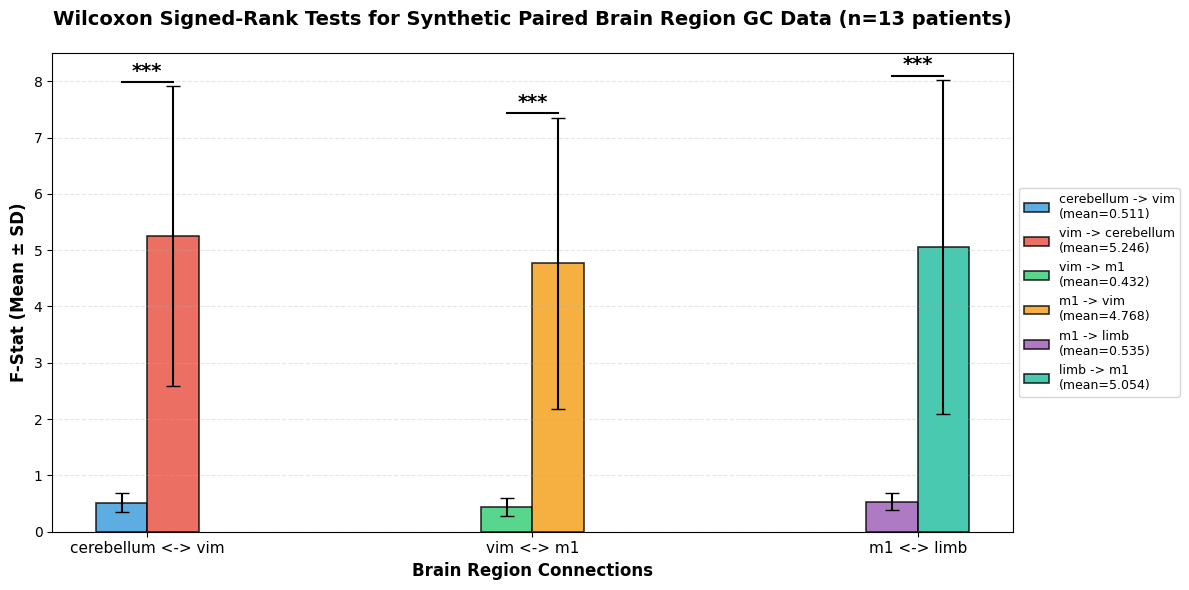


Summary Statistics:
cerebellum -> vim   : mean=0.5114, std=0.1694
vim -> cerebellum   : mean=5.2464, std=2.6616
vim -> m1           : mean=0.4321, std=0.1588
m1 -> vim           : mean=4.7678, std=2.5828
m1 -> limb          : mean=0.5352, std=0.1549
limb -> m1          : mean=5.0543, std=2.9664


In [16]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_patients = 13
n_total_samples = 100
samples_per_patient = n_total_samples // n_patients
remaining = n_total_samples % n_patients

labels = [
    "cerebellum -> vim",
    "vim -> cerebellum",
    "vim -> m1",
    "m1 -> vim",
    "m1 -> limb",
    "limb -> m1"
]

data_arrays = []
patient_ids = []
for array_idx in range(6):
    array_data = []
    array_patient_ids = []

    for patient in range(n_patients):
        # Each patient contributes samples_per_patient samples
        n_samples = samples_per_patient + (1 if patient < remaining else 0)

        # Generate data with some patient-specific random baseline
        patient_baseline = np.random.uniform(0.3, 0.7)
        patient_data = np.random.beta(2, 2) * 0.6 + patient_baseline * 0.4
        if array_idx % 2 == 0:
          patient_samples = np.random.uniform(
              max(0, patient_data - 0.2),
              min(2, patient_data + 0.2),
              n_samples
          )
        else:
          patient_samples = np.random.uniform(
              min(1, patient_data - 0.2),
              max(10, patient_data + 0.2),
              n_samples
          )

        array_data.extend(patient_samples)
        array_patient_ids.extend([patient] * n_samples)

    data_arrays.append(np.array(array_data))
    patient_ids.append(np.array(array_patient_ids))

# Perform Wilcoxon paired tests for each group
groups = [(0, 1), (2, 3), (4, 5)]
group_names = [
    "cerebellum <-> vim",
    "vim <-> m1",
    "m1 <-> limb"
]

p_values = []
statistics = []
for idx1, idx2 in groups:
    statistic, p_value = wilcoxon(data_arrays[idx1], data_arrays[idx2])
    statistics.append(statistic)
    p_values.append(p_value)

# Apply FDR correction (Benjamini-Hochberg)
rejected, p_adjusted, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

print("Wilcoxon Signed-Rank Test Results (Paired Data):")

for i, (idx1, idx2) in enumerate(groups):
    print(f"\nGroup {i+1}: {group_names[i]}")
    print(f"  {labels[idx1]} vs {labels[idx2]}")
    print(f"  P-value (FDR corrected): {p_adjusted[i]:.4f}")

means = [np.mean(arr) for arr in data_arrays]
stds = [np.std(arr, ddof=1) for arr in data_arrays]
fig, ax = plt.subplots(figsize=(12, 6))
group_positions = [0, 3, 6]
bar_width = 0.4
x_positions = []
for i, group_pos in enumerate(group_positions):
    x_positions.extend([group_pos, group_pos + bar_width])

# Colors for each pair
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

bars = ax.bar(x_positions, means, bar_width, yerr=stds,
               capsize=5, color=colors, alpha=0.8,
               edgecolor='black', linewidth=1.2)

ax.set_ylabel('F-Stat (Mean ± SD)', fontsize=12, fontweight='bold')
ax.set_xlabel('Brain Region Connections', fontsize=12, fontweight='bold')
ax.set_title('Wilcoxon Signed-Rank Tests for Synthetic Paired Brain Region GC Data (n=13 patients)',
             fontsize=14, fontweight='bold', pad=20)

ax.set_xticks([pos + bar_width/2 for pos in group_positions])
ax.set_xticklabels(group_names, fontsize=11)

# Add legend outside the plot
legend_labels = [f"{label}\n(mean={m:.3f})" for label, m in zip(labels, means)]
ax.legend(bars, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add statistical significance markers (using FDR-corrected p-values)
y_max = max([m + s for m, s in zip(means, stds)])
for i, (idx1, idx2) in enumerate(groups):

    x1 = group_positions[i]
    x2 = group_positions[i] + bar_width

    # Draw significance bar using FDR-corrected p-values
    if p_adjusted[i] < 0.05:
        y_pos = max(means[idx1] + stds[idx1], means[idx2] + stds[idx2]) + 0.08
        ax.plot([x1, x2], [y_pos, y_pos], 'k-', linewidth=1.5)

        # Add asterisks based on FDR-corrected p-value
        if p_adjusted[i] < 0.001:
            sig_text = '***'
        elif p_adjusted[i] < 0.01:
            sig_text = '**'
        else:
            sig_text = '*'

        ax.text((x1 + x2) / 2, y_pos + 0.02, sig_text,
                ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print()
print("Summary Statistics:")
for i, label in enumerate(labels):
    print(f"{label:20s}: mean={means[i]:.4f}, std={stds[i]:.4f}")